All points within control limits.


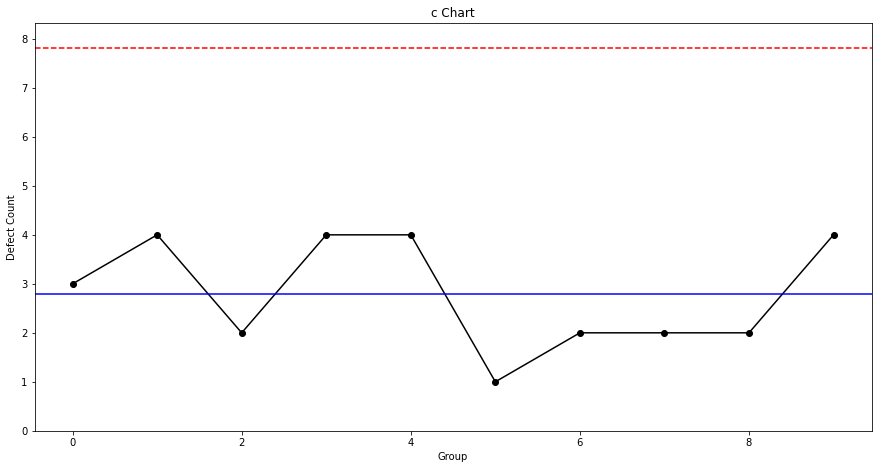

In [1]:

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Set random seed
np.random.seed(42)

# Create dummy data
c = {'defects':np.random.randint(0,5,10).tolist(),
    'group_size':np.repeat(10,10).tolist()}

# Convert data to data frame
c = pd.DataFrame(c)

# Plot c-chart
plt.figure(figsize=(15,7.5))
plt.plot(c['defects'], linestyle='-', marker='o', color='black')
plt.axhline(statistics.mean(c['defects'])+3*np.sqrt(statistics.mean(c['defects'])), color='red', linestyle='dashed')
plt.axhline(statistics.mean(c['defects'])-3*np.sqrt(statistics.mean(c['defects'])), color='red', linestyle='dashed')
plt.axhline(statistics.mean(c['defects']), color='blue')
plt.ylim(bottom=0)
plt.title('c Chart')
plt.xlabel('Group')
plt.ylabel('Defect Count')

# Validate points out of control limits
i = 0
control = True
for group in c['defects']:
    if group > statistics.mean(c['defects'])+3*np.sqrt(statistics.mean(c['defects'])) or group < statistics.mean(c['defects'])-3*np.sqrt(statistics.mean(c['defects'])):
        print('Group', i, 'out of defects cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.
All points within control limits.


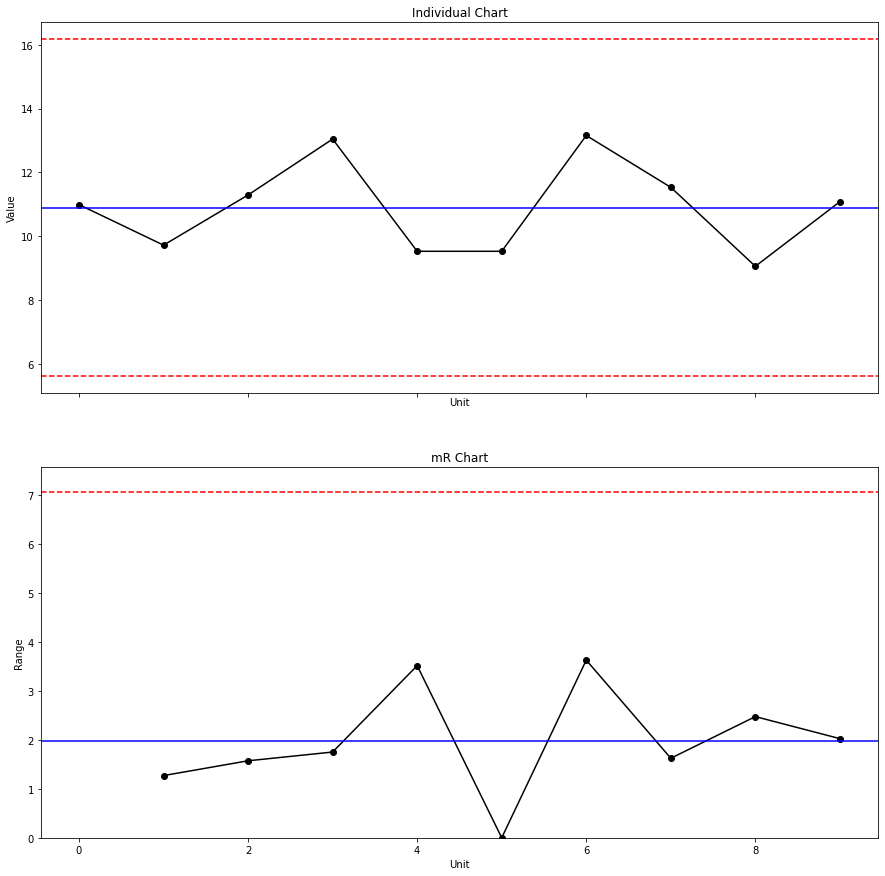

In [2]:

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Set random seed
np.random.seed(42)

# Create dummy data
x = pd.Series(np.random.normal(loc=10, scale=2, size=10))

# Define list variable for moving ranges
MR = [np.nan]

# Get and append moving ranges
i = 1
for data in range(1, len(x)):
    MR.append(abs(x[i] - x[i-1]))
    i += 1

# Convert list to pandas Series objects    
MR = pd.Series(MR)

# Concatenate mR Series with and rename columns
data = pd.concat([x,MR], axis=1).rename(columns={0:"x", 1:"mR"})

# Plot x and mR charts
fig, axs = plt.subplots(2, figsize=(15,15), sharex=True)

# x chart
axs[0].plot(data['x'], linestyle='-', marker='o', color='black')
axs[0].axhline(statistics.mean(data['x']), color='blue')
axs[0].axhline(statistics.mean(data['x'])+3*statistics.mean(data['mR'][1:len(data['mR'])])/1.128, color = 'red', linestyle = 'dashed')
axs[0].axhline(statistics.mean(data['x'])-3*statistics.mean(data['mR'][1:len(data['mR'])])/1.128, color = 'red', linestyle = 'dashed')
axs[0].set_title('Individual Chart')
axs[0].set(xlabel='Unit', ylabel='Value')

# mR chart
axs[1].plot(data['mR'], linestyle='-', marker='o', color='black')
axs[1].axhline(statistics.mean(data['mR'][1:len(data['mR'])]), color='blue')
axs[1].axhline(statistics.mean(data['mR'][1:len(data['mR'])])+3*statistics.mean(data['mR'][1:len(data['mR'])])*0.8525, color='red', linestyle ='dashed')
axs[1].axhline(statistics.mean(data['mR'][1:len(data['mR'])])-3*statistics.mean(data['mR'][1:len(data['mR'])])*0.8525, color='red', linestyle ='dashed')
axs[1].set_ylim(bottom=0)
axs[1].set_title('mR Chart')
axs[1].set(xlabel='Unit', ylabel='Range')

# Validate points out of control limits for x chart
i = 0
control = True
for unit in data['x']:
    if unit > statistics.mean(data['x'])+3*statistics.mean(data['mR'][1:len(data['mR'])])/1.128 or unit < statistics.mean(data['x'])-3*statistics.mean(data['mR'][1:len(data['mR'])])/1.128:
        print('Unit', i, 'out of cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for mR chart
i = 0
control = True
for unit in data['mR']:
    if unit > statistics.mean(data['mR'][1:len(data['mR'])])+3*statistics.mean(data['mR'][1:len(data['mR'])])*0.8525 or unit < statistics.mean(data['mR'][1:len(data['mR'])])-3*statistics.mean(data['mR'][1:len(data['mR'])])*0.8525:
        print('Unit', i, 'out of control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

Group 5 out of mean control limits!
All points within control limits.


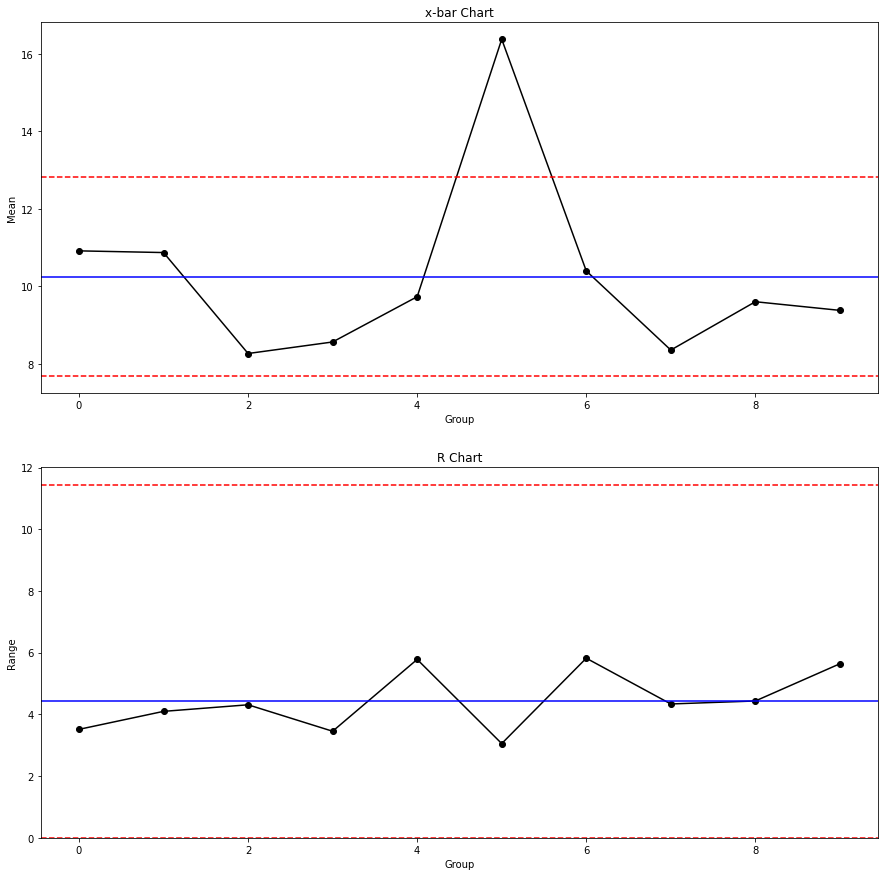

In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Set random seed
np.random.seed(42)

# Create dummy data
x = np.array([list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=17, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5)),
        list(np.random.normal(loc=10, scale=2, size=5))])
        
# Define list variable for groups means
x_bar = []

# Define list variable for groups ranges
r = [] 

# Get and append groups means and ranges
for group in x:
    x_bar.append(group.mean())
    r.append(group.max() - group.min())
    
# Plot x-bar and R charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-0.577*statistics.mean(r)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# R chart
axs[1].plot(r, linestyle='-', marker='o', color='black')
axs[1].axhline((2.574*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((0*statistics.mean(r)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(r)), color='blue')
axs[1].set_ylim(bottom=0)
axs[1].set_title('R Chart')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+0.577*statistics.mean(r) or group < statistics.mean(x_bar)-0.577*statistics.mean(r):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for R chart
i = 0
control = True
for group in r:
    if group > 2.574*statistics.mean(r):
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

Group 7 out of mean control limits!
All points within control limits.


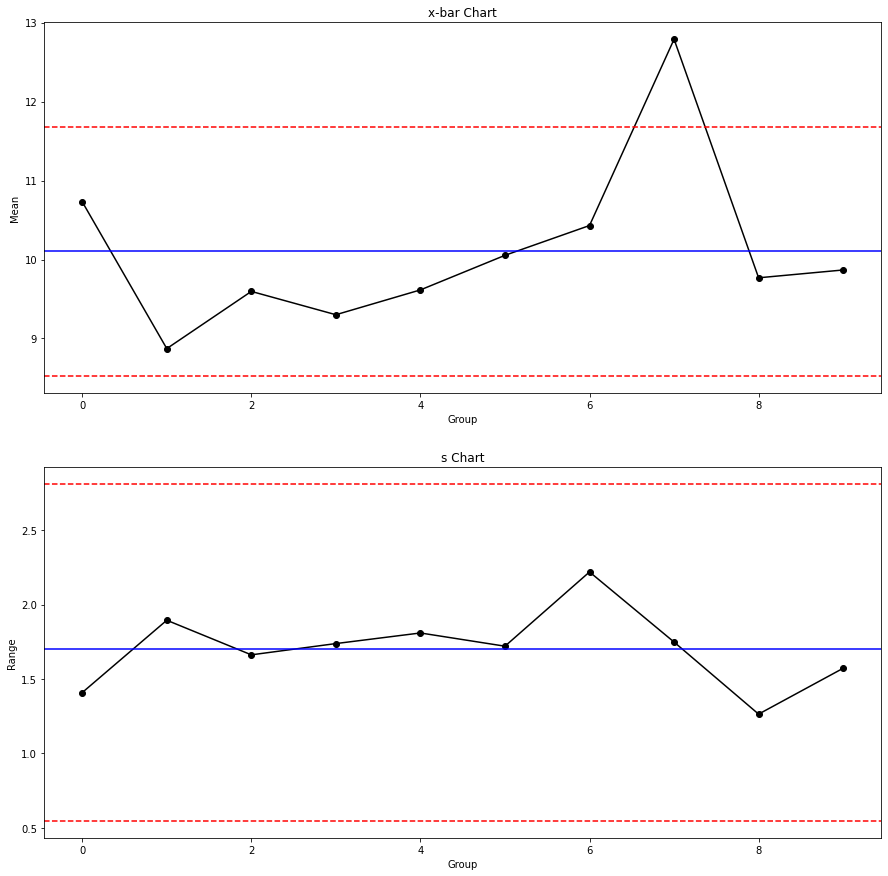

In [5]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

# Set random seed
np.random.seed(42)

# Create dummy data
x = np.array([list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=13, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11)),
        list(np.random.normal(loc=10, scale=2, size=11))])
        
# Define list variable for groups means
x_bar = []

# Define list variable for groups standard deviation
s = [] 

# Get and append groups means and standard deviations
for group in x:
    x_bar.append(group.mean())
    s.append(np.std(group))
    
# Plot x-bar and s charts
fig, axs = plt.subplots(2, figsize=(15,15))

# x-bar chart
axs[0].plot(x_bar, linestyle='-', marker='o', color='black')
axs[0].axhline((statistics.mean(x_bar)+0.927*statistics.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)-0.927*statistics.mean(s)), color='red', linestyle='dashed')
axs[0].axhline((statistics.mean(x_bar)), color='blue')
axs[0].set_title('x-bar Chart')
axs[0].set(xlabel='Group', ylabel='Mean')

# s chart
axs[1].plot(s, linestyle='-', marker='o', color='black')
axs[1].axhline((1.649*statistics.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((0.321*statistics.mean(s)), color='red', linestyle='dashed')
axs[1].axhline((statistics.mean(s)), color='blue')
axs[1].set_title('s Chart')
axs[1].set(xlabel='Group', ylabel='Range')

# Validate points out of control limits for x-bar chart
i = 0
control = True
for group in x_bar:
    if group > statistics.mean(x_bar)+0.927*statistics.mean(s) or group < statistics.mean(x_bar)-0.927*statistics.mean(s):
        print('Group', i, 'out of mean control limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')
    
# Validate points out of control limits for s chart
i = 0
control = True
for group in s:
    if group > 1.649*statistics.mean(s) or group < 0.321*statistics.mean(s):
        print('Group', i, 'out of standard deviation cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')